In [1]:
# This script is used to run the detection script in the VBT module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')

if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f'Added {root_dir} to sys.path')


try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError:
    print("VBT module not found. Please check the module path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: C:\Users\timos\Desktop\BounceInsight
Root Directory exists: C:\Users\timos\Desktop
Added C:\Users\timos\Desktop to sys.path
Successfully imported BounceInsight


In [13]:
insight.validate(tolerance=0.1)

Validation results saved to validation/validation_results.xlsx
        file_name participant_id  t_ecc_diff t_ecc_comparison  t_con_diff  \
0   00_bounce70b1             00         NaN             None        0.14   
1   00_bounce70b2             00         NaN             None        0.10   
2   00_bounce70b3             00         0.9       gym_higher        0.46   
3  00_bounce70nb2             00         NaN             None        0.16   
4  00_bounce70nb3             00         NaN             None        0.16   

  t_con_comparison  t_total_diff t_total_comparison  turning_force_diff  \
0       gym_higher           NaN               None                 NaN   
1       gym_higher           NaN               None                 NaN   
2       gym_higher          1.39         gym_higher              601.07   
3       gym_higher           NaN               None                 NaN   
4       gym_higher           NaN               None                 NaN   

  turning_force_compari

Contingency Table:
has_dip  False  True 
group                
slowb        9     80
slownb      72     15
Chi-Square Test:
Chi2: 90.56154673902363, p-value: 1.793115451963318e-21, Degrees of Freedom: 1


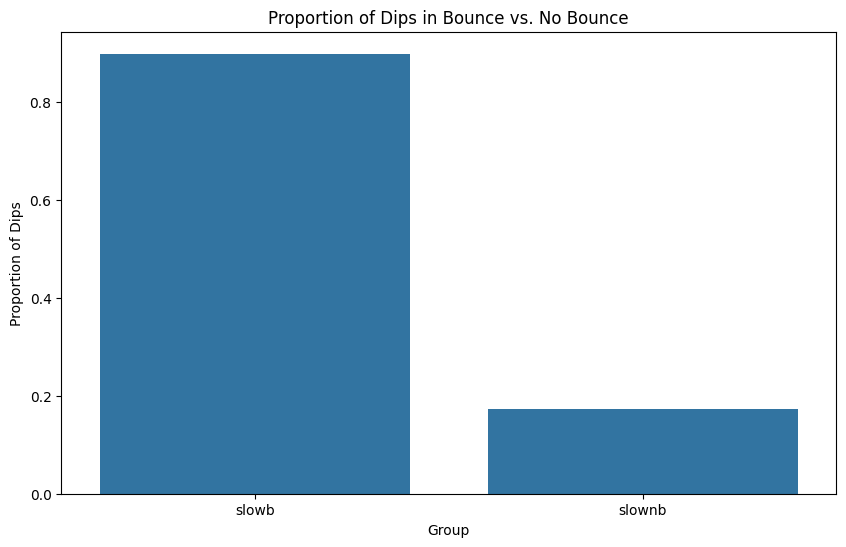

In [17]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_slow')

Dip detected: False


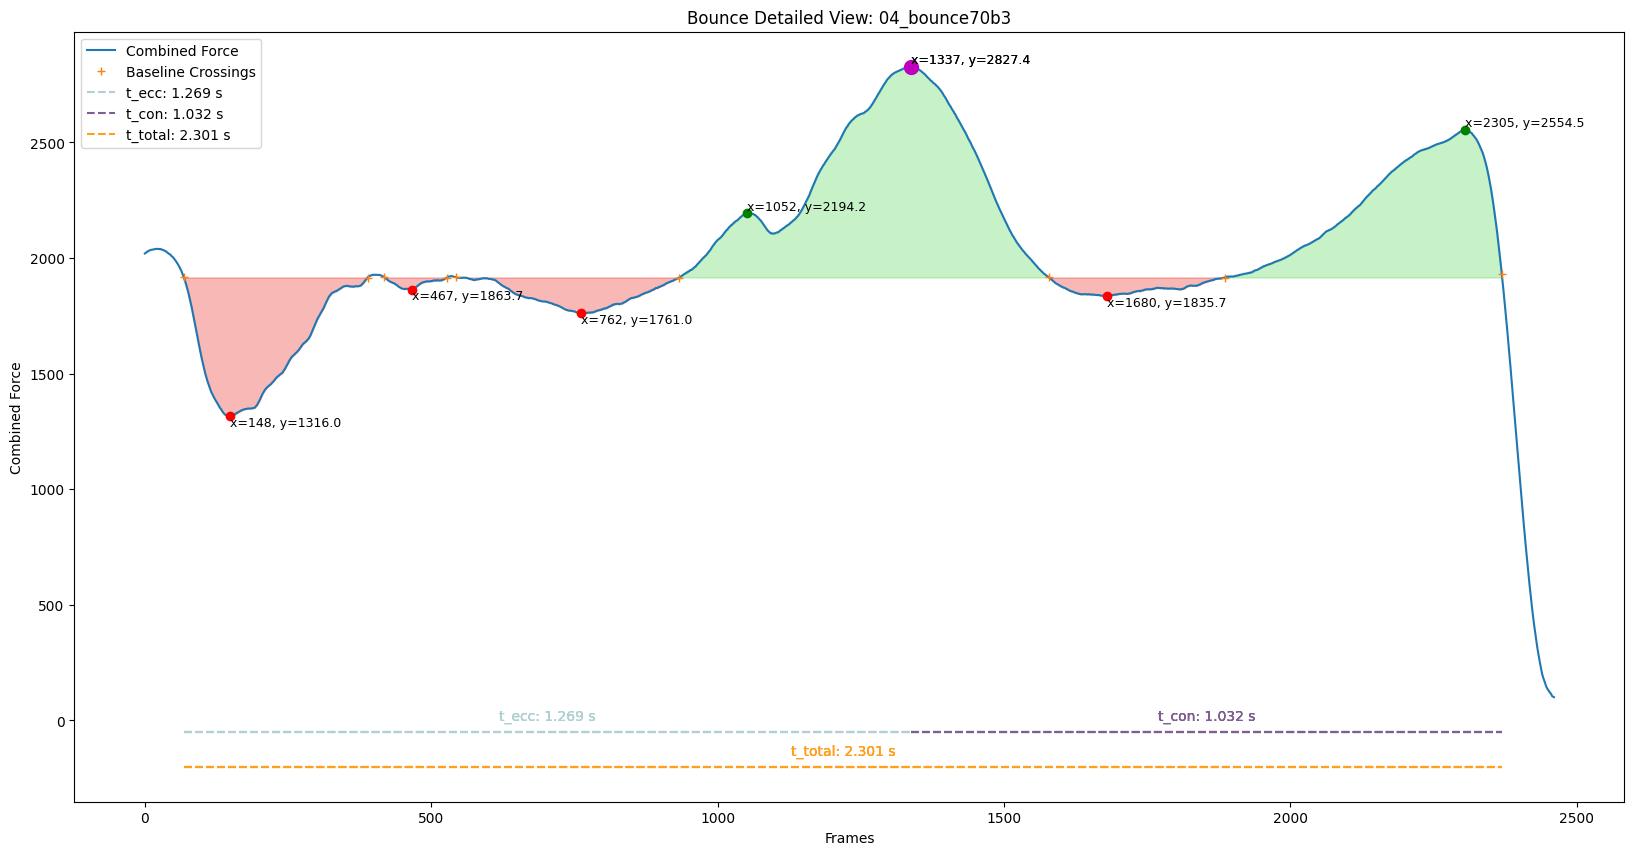

In [5]:
insight.plot_data(file_name='04_bounce70b3')

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: b_nb_weight
ANOVA results for turning_force comparing bounce and nobounce:
                sum_sq     df          F        PR(>F)
C(group)  2.283393e+07    1.0  61.710896  3.171254e-14
Residual  1.602163e+08  433.0        NaN           NaN


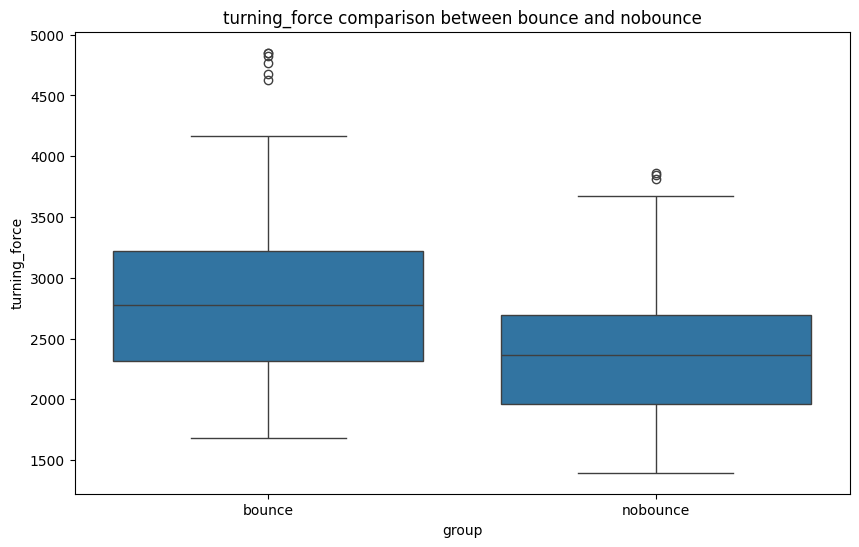

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: b_nb_speed
ANOVA results for turning_force comparing bounce and nobounce:
                sum_sq     df         F        PR(>F)
C(group)  1.824834e+07    1.0  70.73772  1.066461e-15
Residual  8.977421e+07  348.0       NaN           NaN


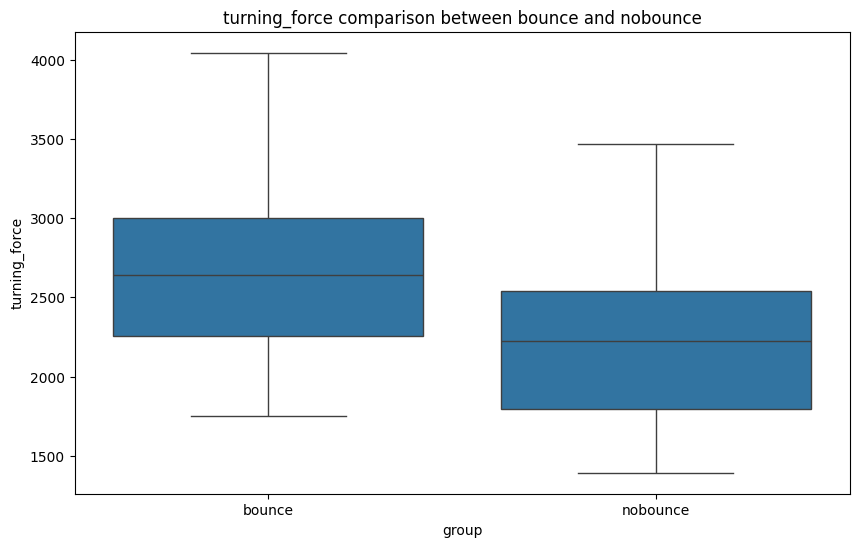

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: b_nb_all
ANOVA results for turning_force comparing bounce and nobounce:
                sum_sq     df           F        PR(>F)
C(group)  4.101680e+07    1.0  125.871672  3.426150e-27
Residual  2.551500e+08  783.0         NaN           NaN


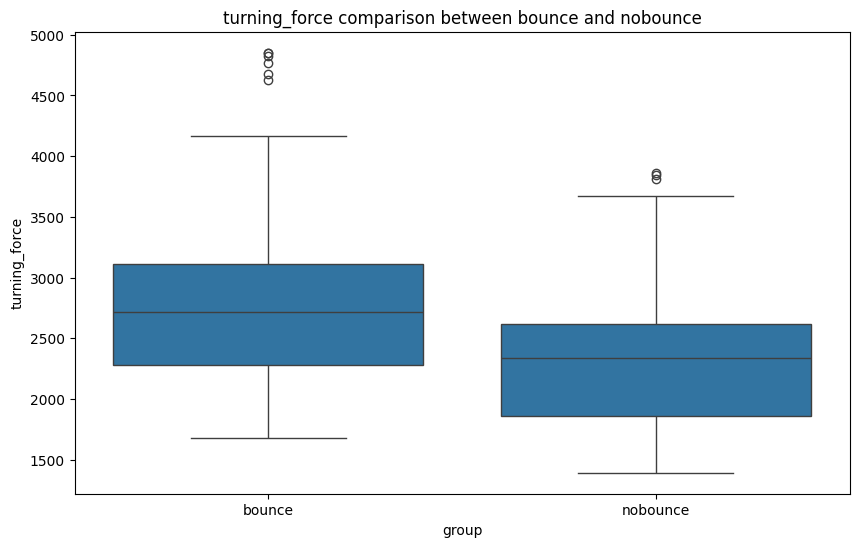

In [12]:
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_weight', metric='turning_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_speed', metric='turning_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_all', metric='turning_force')

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: weightnb
ANOVA results for turning_force comparing bounce70nb and bounce80nb:
                sum_sq     df         F    PR(>F)
C(group)  6.585026e+05    1.0  2.266621  0.133662
Residual  6.217164e+07  214.0       NaN       NaN


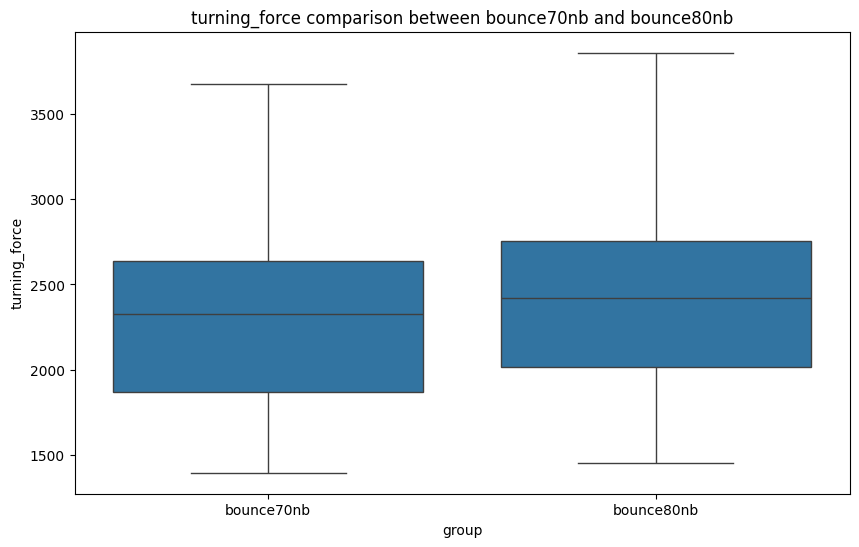

In [19]:
insight.run_statistics(analysis_type='anova', metric='turning_force', comparison_type='weightnb')

In [11]:
# insight.analyse_bounce(id=None, plot=False)